Original array: [3, 6, 8, 10, 1, 2, 1]
Sorted array (Non-random): [1, 1, 2, 3, 6, 8, 10]
Sorted array (Random): [1, 1, 2, 3, 6, 8, 10]


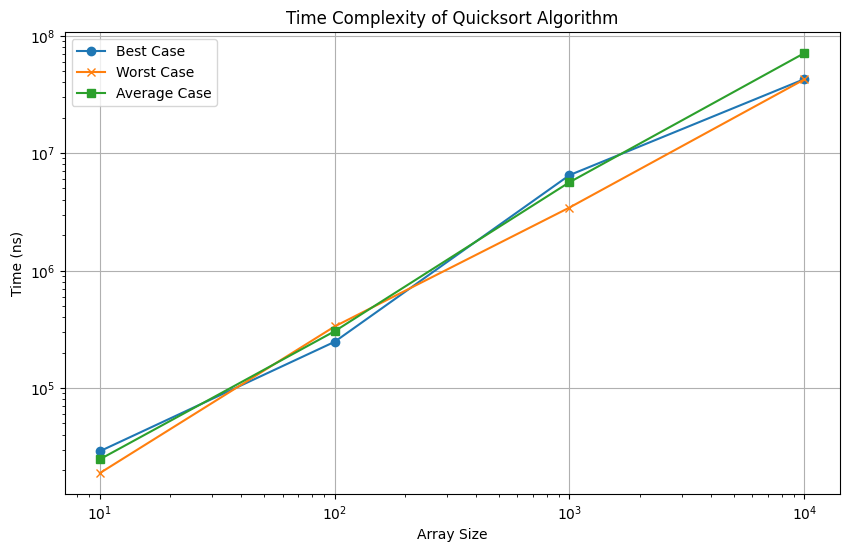

In [1]:
import random
import time
import matplotlib.pyplot as plt

def quicksort(arr):
    """Standard recursive quicksort implementation."""
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def iterative_quicksort(arr):
    """Iterative quicksort implementation."""
    if len(arr) <= 1:
        return arr

    stack = [arr]
    result = []

    while stack:
        sub_array = stack.pop()
        if len(sub_array) <= 1:
            result.extend(sub_array)
            continue

        pivot = sub_array[len(sub_array) // 2]
        left = [x for x in sub_array if x < pivot]
        middle = [x for x in sub_array if x == pivot]
        right = [x for x in sub_array if x > pivot]

        stack.append(right)
        stack.append(middle)
        stack.append(left)

    return result

def benchmark_quicksort():
    """Benchmark quicksort for best, worst, and average cases."""
    array_sizes = [10, 100, 1000, 10000]
    best_case_times = []
    worst_case_times = []
    average_case_times = []

    for size in array_sizes:
        # Generate datasets
        best_case_data = list(range(size))
        worst_case_data = list(range(size, 0, -1))
        average_case_data = [random.randint(0, size * 10) for _ in range(size)]

        # Best case benchmark
        start_time = time.time_ns()
        quicksort(best_case_data)
        best_case_times.append(time.time_ns() - start_time)

        # Worst case benchmark
        start_time = time.time_ns()
        quicksort(worst_case_data)
        worst_case_times.append(time.time_ns() - start_time)

        # Average case benchmark
        start_time = time.time_ns()
        quicksort(average_case_data)
        average_case_times.append(time.time_ns() - start_time)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(array_sizes, best_case_times, label='Best Case', marker='o')
    plt.plot(array_sizes, worst_case_times, label='Worst Case', marker='x')
    plt.plot(array_sizes, average_case_times, label='Average Case', marker='s')
    plt.xlabel('Array Size')
    plt.ylabel('Time (ns)')
    plt.title('Time Complexity of Quicksort Algorithm')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

def nonrandom_quicksort(arr):
    """Quicksort using the first element as the pivot."""
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    less = [x for x in arr[1:] if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr[1:] if x > pivot]
    return nonrandom_quicksort(less) + equal + nonrandom_quicksort(greater)

def quicksort_random(arr):
    """Quicksort using a random pivot."""
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quicksort_random(less) + equal + quicksort_random(greater)

# Example usage
if __name__ == "__main__":
    # Example array
    arr = [3, 6, 8, 10, 1, 2, 1]
    print("Original array:", arr)

    # Sorting using nonrandom quicksort
    sorted_arr_nonrandom = nonrandom_quicksort(arr)
    print("Sorted array (Non-random):", sorted_arr_nonrandom)

    # Sorting using random quicksort
    sorted_arr_random = quicksort_random(arr)
    print("Sorted array (Random):", sorted_arr_random)

    # Benchmarking the quicksort algorithm
    benchmark_quicksort()


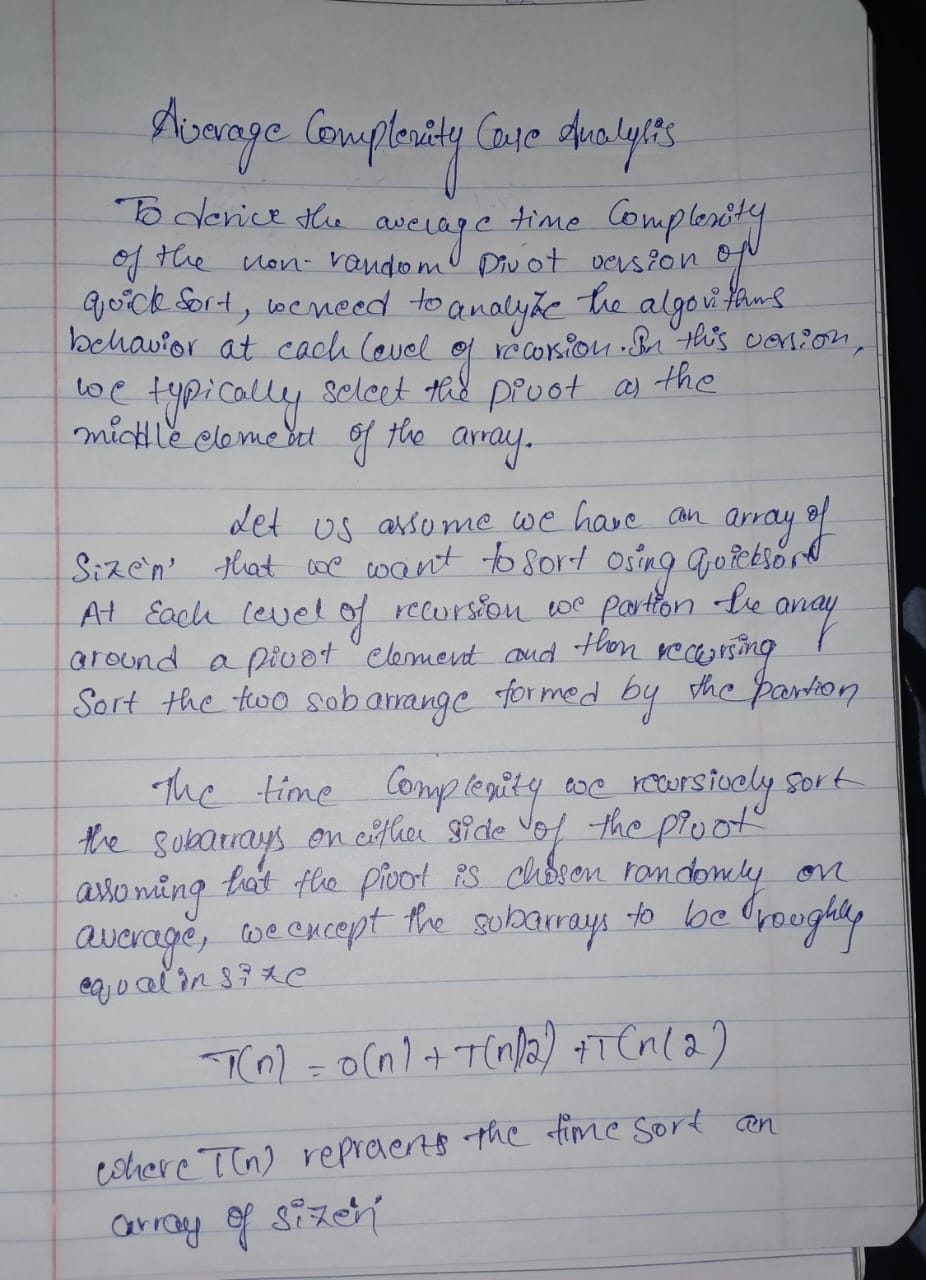

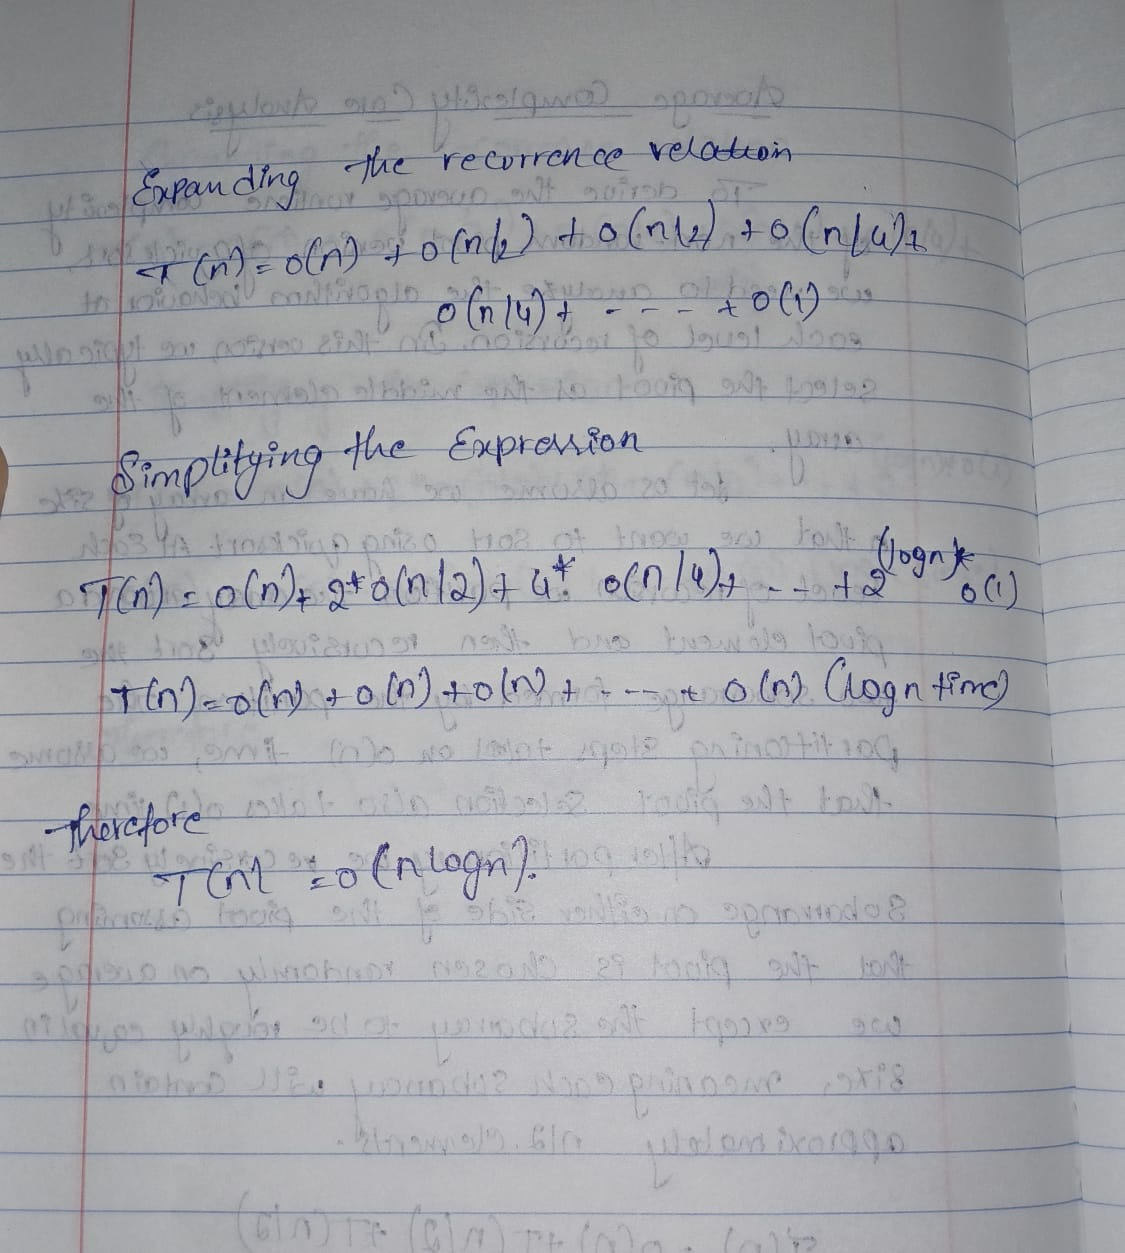